In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
plt.style.use('ggplot')

In [49]:
df_film = pd.read_csv("archive\data.csv", converters={'Director': lambda x: x[1:-1].replace("'", "").split(','), 'Genre': lambda x: x[1:-1].replace("'", "").split(','), 'Stars': lambda x: x[1:-1].replace("'", "").split(','), 'Description': lambda x: x[1:-1].replace("'", "").split(',')})

In [50]:
df_film.shape

(10000, 13)

In [51]:
df_film.describe(include="all")

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
count,10000.00000,10000,10000.000000,10000.000000,10000.000000,1.000000e+04,7974.000000,7.085000e+03,10000,9631,10000,10000,10000
unique,NaN,9632,NaN,NaN,NaN,NaN,NaN,NaN,425,24,4162,9947,9996
top,NaN,The Mummy,NaN,NaN,NaN,NaN,NaN,NaN,"[Comedy, Drama, Romance]",R,[Woody Allen],"[William Shatner, Leonard Nimoy, DeForest Ke...","[When, three, young, women, are, implicat..."
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,481,4048,47,6,2
mean,4999.50000,NaN,2001.413600,110.725000,6.727020,9.279738e+04,59.171432,4.017500e+07,NaN,NaN,NaN,NaN,NaN
std,2886.89568,NaN,18.597804,22.053073,0.821264,1.716509e+05,17.268795,6.748658e+07,NaN,NaN,NaN,NaN,NaN
min,0.00000,NaN,1915.000000,45.000000,4.900000,1.000200e+04,7.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,2499.75000,NaN,1994.000000,96.000000,6.100000,1.685175e+04,47.000000,2.340000e+06,NaN,NaN,NaN,NaN,NaN
50%,4999.50000,NaN,2007.000000,107.000000,6.700000,3.417950e+04,60.000000,1.693000e+07,NaN,NaN,NaN,NaN,NaN
75%,7499.25000,NaN,2015.000000,121.000000,7.300000,9.154600e+04,72.000000,4.864000e+07,NaN,NaN,NaN,NaN,NaN


In [52]:
df_film.isna().sum()

Unnamed: 0                0
Movie Name                0
Year of Release           0
Run Time in minutes       0
Movie Rating              0
Votes                     0
MetaScore              2026
Gross                  2915
Genre                     0
Certification           369
Director                  0
Stars                     0
Description               0
dtype: int64

In [53]:
df_film.sort_values(by=['Movie Rating'],ascending=False).head(10)

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,[Drama],R,[Frank Darabont],"[Tim Robbins, Morgan Freeman, Bob Gunton, W...","[Over, the, course, of, several, years, ,..."
2,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"[Animation, Action, Adventure]",PG,"[Ram Mohan, Yûgô Sakô, Koichi Saski]","[Arun Govil, Nikhil Kapoor, Edie Mirman, Ra...","[An, anime, adaptation, of, the, Hindu, ..."
3,3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"[Comedy, Drama]",NaN,[Ertem Egilmez],"[Kemal Sunal, Münir Özkul, Halit Akçatepe, ...","[Lazy, , uneducated, students, share, a, ..."
1,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"[Crime, Drama]",R,[Francis Ford Coppola],"[Marlon Brando, Al Pacino, James Caan, Dian...","[Don, Vito, Corleone, , head, of, a, maf..."
4,4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"[Action, Crime, Drama]",PG-13,[Christopher Nolan],"[Christian Bale, Heath Ledger, Aaron Eckhart...","[When, the, menace, known, as, the, Joke..."
5,5,Schindler's List,1993,195,9.0,1409869,95.0,96900000.0,"[Biography, Drama, History]",R,[Steven Spielberg],"[Liam Neeson, Ralph Fiennes, Ben Kingsley, ...","[In, German-occupied, Poland, during, Worl..."
6,6,The Lord of the Rings: The Return of the King,2003,201,9.0,1919908,94.0,377850000.0,"[Action, Adventure, Drama]",PG-13,[Peter Jackson],"[Elijah Wood, Viggo Mortensen, Ian McKellen,...","[Gandalf, and, Aragorn, lead, the, World,..."
7,7,12 Angry Men,1957,96,9.0,834248,97.0,4360000.0,"[Crime, Drama]",Approved,[Sidney Lumet],"[Henry Fonda, Lee J. Cobb, Martin Balsam, J...","[The, jury, in, a, New, York, City, mur..."
8,8,The Godfather Part II,1974,202,9.0,1327069,90.0,57300000.0,"[Crime, Drama]",R,[Francis Ford Coppola],"[Al Pacino, Robert De Niro, Robert Duvall, ...","[The, early, life, and, career, of, Vito..."
9,9,Mirror Game,2016,147,9.0,29102,NaN,NaN,"[Crime, Mystery, Thriller]",NaN,[Amitabh Reza Chowdhury],"[Chanchal Chowdhury, Masuma Rahman Nabila, P...","[Ayna, , an, alleged, chef, but, a, acto..."


<Axes: >

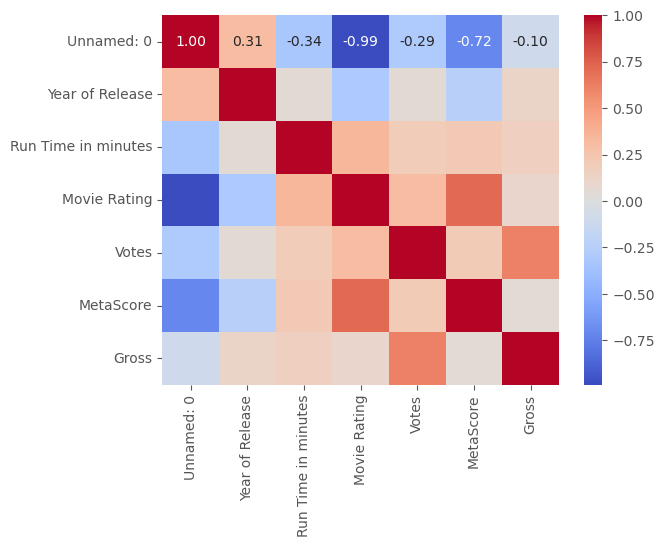

In [54]:
sns.heatmap(df_film.select_dtypes(include='number').corr(), annot=True, fmt='.2f', cmap='coolwarm')     

In [55]:
movies_per_year =  df_film.groupby(['Year of Release'])
df_film['Decade'] = df_film['Year of Release']//10*10

<Axes: xlabel='Year of Release'>

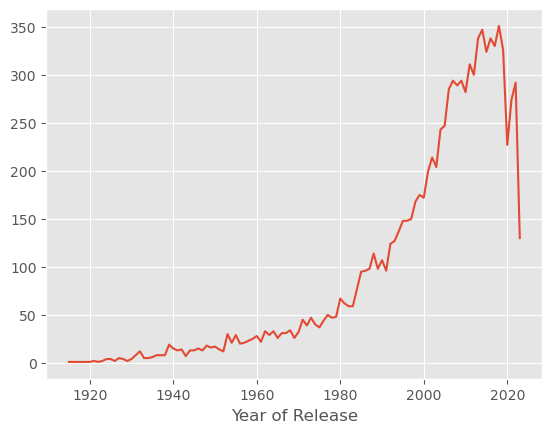

In [56]:
movies_per_year.size().plot()

# Run Time


In [57]:
average_run_time = movies_per_year['Run Time in minutes'].mean()
print(average_run_time)
median_run_time = movies_per_year['Run Time in minutes'].median()

Year of Release
1915    195.000000
1916    163.000000
1919     90.000000
1920     67.000000
1921     87.500000
           ...    
2019    113.392638
2020    108.246696
2021    117.470803
2022    121.212329
2023    122.761538
Name: Run Time in minutes, Length: 107, dtype: float64


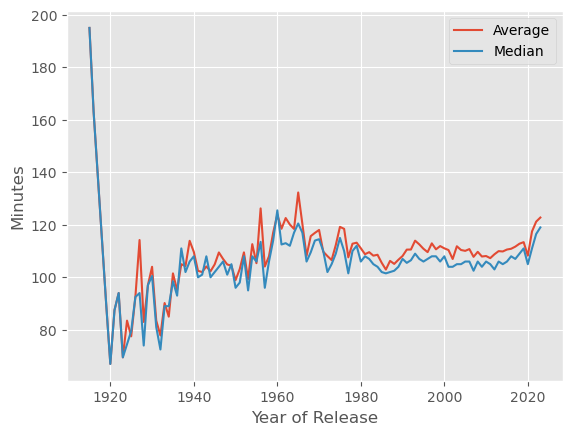

In [58]:
fig, ax = plt.subplots()
line1 = ax.plot(average_run_time)
line2 = ax.plot(median_run_time)
plt.xlabel('Year of Release')
plt.ylabel('Minutes')
plt.legend(["Average", "Median"])
plt.show()

In [59]:
average_run_time.describe()

count    107.000000
mean     108.286036
std       14.921425
min       67.000000
25%      104.343750
50%      109.466667
75%      112.703141
max      195.000000
Name: Run Time in minutes, dtype: float64

(array([4.470e+02, 7.387e+03, 1.884e+03, 2.520e+02, 2.100e+01, 5.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([ 45. ,  84.4, 123.8, 163.2, 202.6, 242. , 281.4, 320.8, 360.2,
        399.6, 439. ]),
 <BarContainer object of 10 artists>)

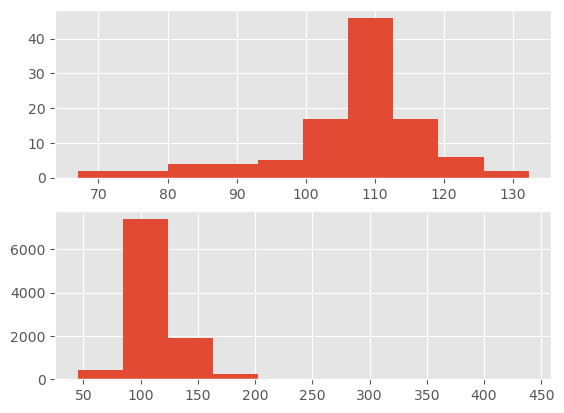

In [60]:
fig, ax = plt.subplots(2, 1)

average_run_time_hist = average_run_time[average_run_time<150]
ax[0].hist(average_run_time_hist)
ax[1].hist(df_film['Run Time in minutes'])

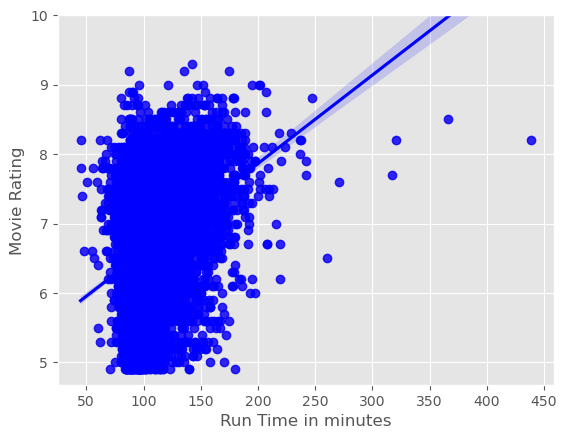

In [61]:
fig, ax =  plt.subplots()
ax.scatter(df_film['Run Time in minutes'], df_film['Movie Rating'], alpha=0.3)
plt.ylabel("IMDB Rating")
plt.xlabel("Gross")
plt.ylim(top=10)
sns.regplot(x = df_film['Run Time in minutes'], y = df_film['Movie Rating'], color="b")
plt.show()

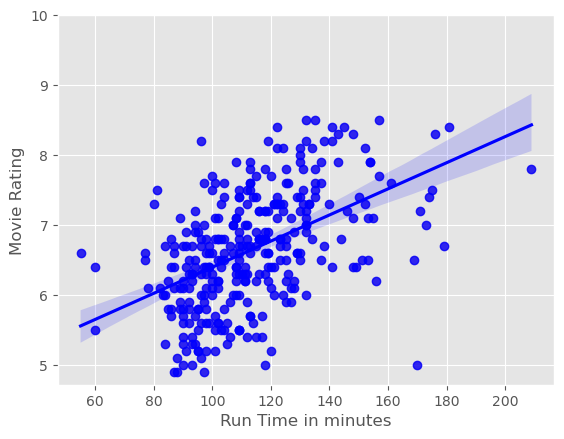

In [62]:
df_2019 = df_film.loc[df_film['Year of Release'] == 2019]

fig, ax =  plt.subplots()
ax.scatter(df_2019['Run Time in minutes'], df_2019['Movie Rating'], alpha=0.3)
plt.ylabel("IMDB Rating")
plt.xlabel("Gross")
plt.ylim(top=10)
sns.regplot(x = df_2019['Run Time in minutes'], y = df_2019['Movie Rating'], color="b")
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

results = {"Year": [], 'R2' : [], "MSE": [], 'Coeff':[], "Int": []}

for t in np.linspace(2000, 2022, dtype=int,num=14):
    
    df = df_film.loc[df_film['Year of Release'] == t]
    print(t)
    X = df['Run Time in minutes']
    
    y = df['Movie Rating']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,train_size=0.8, random_state=25)
    
    # Perform linear regression
    model = LinearRegression()
    model.fit(np.array(X_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

    # Evaluate the model
    y_pred = model.predict(np.array(X_test).reshape(-1,1))
#     print('R-squared:', r2_score(y_test, y_pred))
#     print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

#     # Model coefficients
#     print('Coefficients:', model.coef_)
#     print('Intercept:', model.intercept_)
    
    results['Year'].append(t)
    results['R2'].append(r2_score(y_test, y_pred))
    results['MSE'].append(mean_squared_error(y_test, y_pred, squared=False))
    results['Coeff'].append(model.coef_)
    results['Int'].append(model.intercept_)
    
df_lr = pd.DataFrame(data=results)

2000
2001
2003
2005
2006
2008
2010
2011
2013
2015
2016
2018
2020
2022


c:\Programming\envs\Questions\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

c:\Programming\envs\Questions\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

c:\Programming\envs\Questions\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

c:\Programming\envs\Questions\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squar

In [64]:
df_lr

,Year,R2,MSE,Coeff,Int
0,2000,0.290835,0.681105,[[0.011790385741487094]],[5.339783411309248]
1,2001,-0.010084,0.579419,[[0.0180889967043251]],[4.652505624125698]
2,2003,0.180672,0.696627,[[0.011449631451540413]],[5.3689835845965375]
3,2005,0.217517,0.758060,[[0.01680554969501427]],[4.771362041080683]
4,2006,0.096826,0.700622,[[0.016457254983980433]],[4.793176578481251]
5,2008,0.075298,0.710714,[[0.014601313273855611]],[4.959888023636206]
6,2010,0.184321,0.779032,[[0.01652387563466575]],[4.780240688658576]
7,2011,-0.157979,0.795745,[[0.01780254271479752]],[4.626595213273161]
8,2013,0.113969,0.729714,[[0.01651808106340635]],[4.75240260414747]
9,2015,0.206742,0.721156,[[0.0181707595998698]],[4.569700754125568]


# GROSS

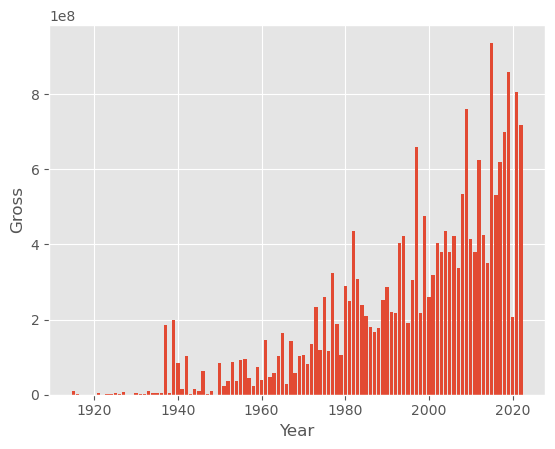

In [65]:
fix, ax = plt.subplots()
ax.bar(df_film['Year of Release'], df_film['Gross'])
plt.ylabel("Gross")
plt.xlabel("Year")
plt.show()

In [66]:
df_film['Gross'].median(), df_film['Gross'].mean()

(16930000.0, 40175003.52858151)

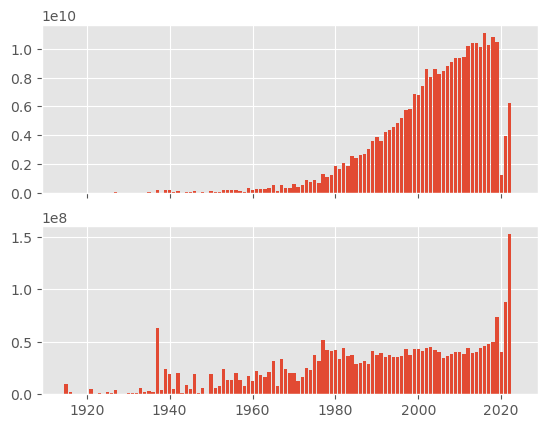

In [67]:
gross_sum, gross_avg = movies_per_year['Gross'].sum(),  movies_per_year['Gross'].mean()

gross_sum
fig, ax = plt.subplots(2, 1, sharex="all")
ax[0].bar(gross_sum.index, gross_sum)
ax[1].bar(gross_avg.index, gross_avg)
plt.show()

<Axes: xlabel='Year of Release'>

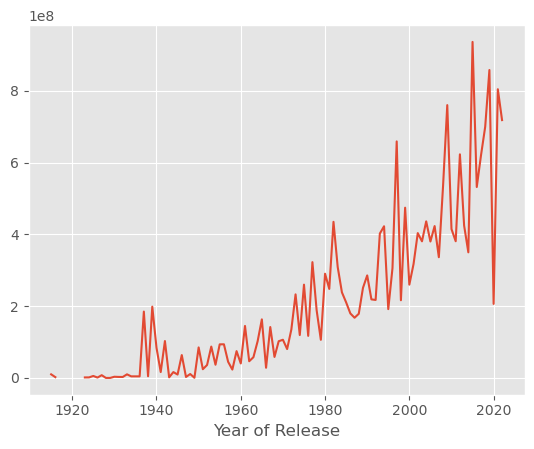

In [68]:
movies_per_year['Gross'].max().plot()

In [69]:
movies_per_year['Gross'].transform(max)

C:\Users\Luiz Venosa\AppData\Local\Temp\ipykernel_33724\1941951408.py:1: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.



0       422780000.0
1       134970000.0
2       402450000.0
3       260000000.0
4       534860000.0
           ...     
9995    620180000.0
9996    804750000.0
9997    532180000.0
9998    700060000.0
9999    858370000.0
Name: Gross, Length: 10000, dtype: float64

In [70]:
diff_sum = movies_per_year['Gross'].max()/ (gross_sum - movies_per_year['Gross'].max())
diff_mean = movies_per_year['Gross'].max()/(gross_avg)

In [71]:
diff_sum = diff_sum[diff_sum.index>=2000]

<Axes: xlabel='Year of Release'>

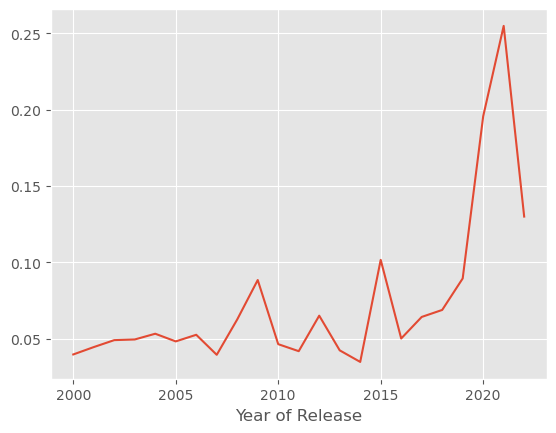

In [72]:
diff_sum.plot()

<Axes: xlabel='Year of Release'>

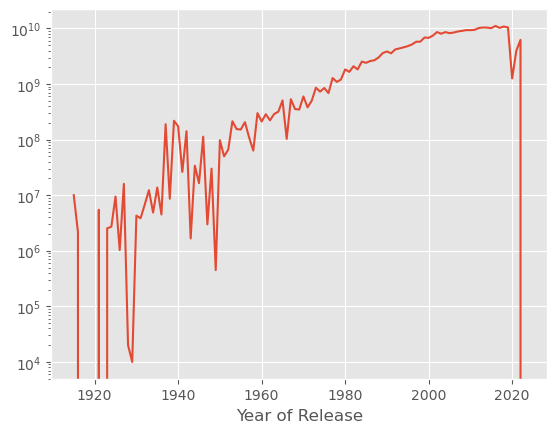

In [73]:
fig, ax = plt.subplots()
gross_sum.plot(logy=True)

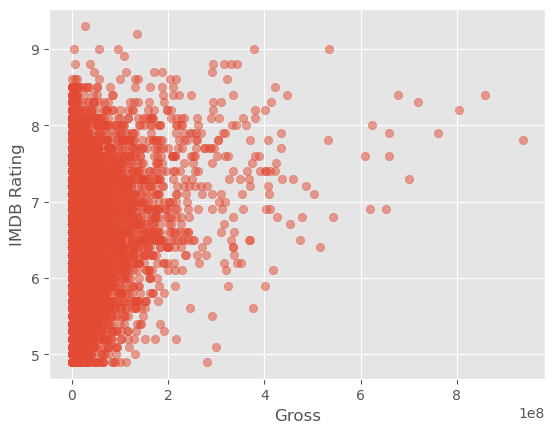

In [74]:
#bivariate gross and rating
fig, ax =  plt.subplots()
ax.scatter(df_film['Gross'], df_film['Movie Rating'], alpha=0.5)
plt.ylabel("IMDB Rating")
plt.xlabel("Gross")
plt.show()

IMDB and N# votes

<Axes: >

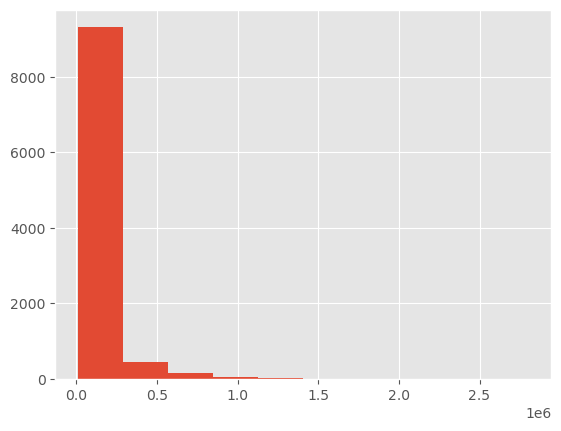

In [75]:
df_film['Votes'].hist()

In [76]:
df_film['Votes'].median(), df_film['Votes'].mean()

(34179.5, 92797.375)

<Axes: >

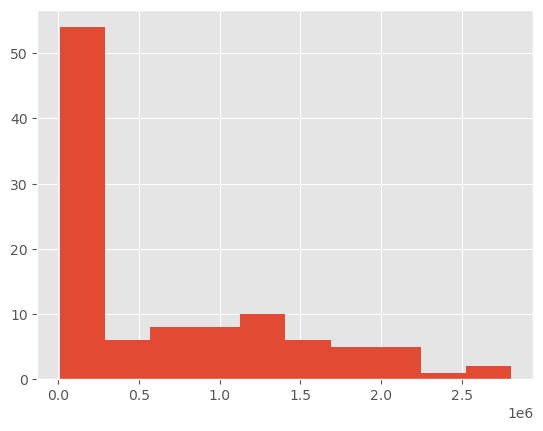

In [77]:
top_10 = df_film.loc[ df_film['Movie Rating'] >= df_film['Movie Rating'].quantile(0.99)]
top_10['Votes'].hist()

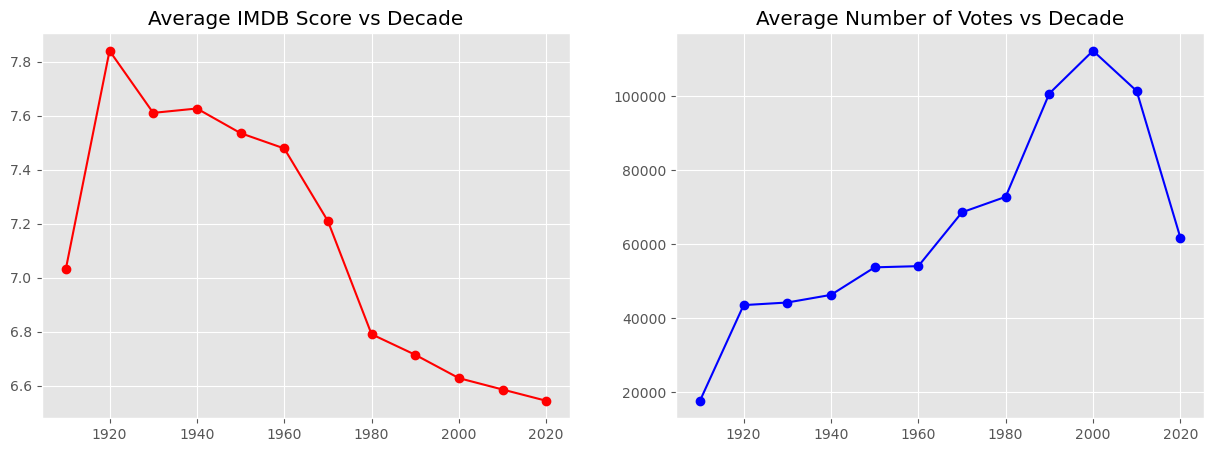

In [78]:
#per decade instead per year
df_film['Decade'] = df_film['Year of Release']//10*10    

#redo the plots per decade
movies_per_decade = df_film.groupby(['Decade'])
average_imdb_decade = movies_per_decade['Movie Rating'].mean()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
#add title

ax[0].plot(average_imdb_decade, color='red', label='IMDB Score', marker='o', linestyle='-')
ax[0].set_title('Average IMDB Score vs Decade')
ax[1].plot(movies_per_decade['Votes'].mean(), color='blue', label='Number of Votes', marker='o', linestyle='-')
ax[1].set_title('Average Number of Votes vs Decade')
plt.show()

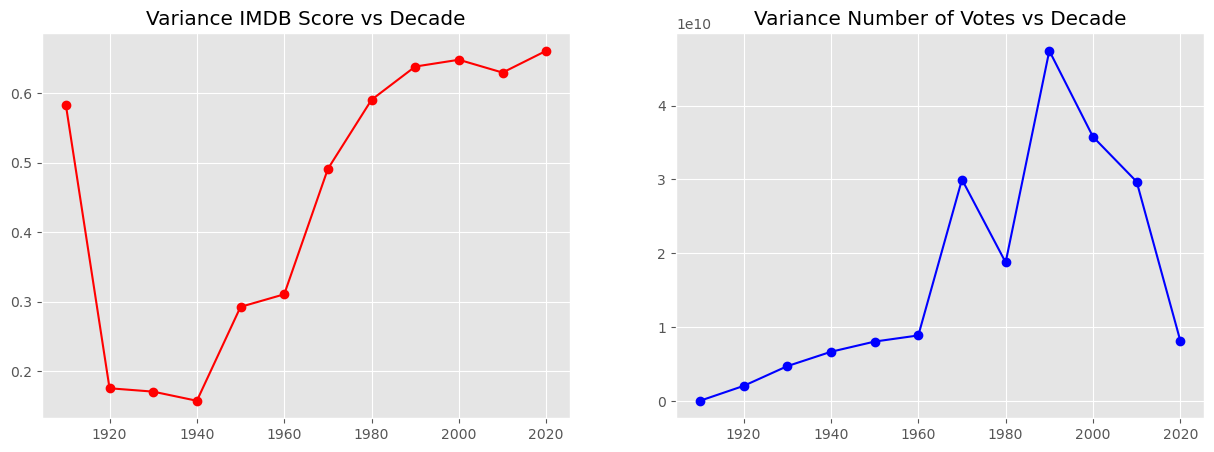

In [79]:
#per decade instead per year


#redo the plots per decade

var_imdb_decade = movies_per_decade['Movie Rating'].var()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
#add title

ax[0].plot(var_imdb_decade, color='red', label='IMDB Score', marker='o', linestyle='-')
ax[0].set_title('Variance IMDB Score vs Decade')
ax[1].plot(movies_per_decade['Votes'].var(), color='blue', label='Number of Votes', marker='o', linestyle='-')
ax[1].set_title('Variance Number of Votes vs Decade')
plt.show()

Text(0, 0.5, 'Votes')

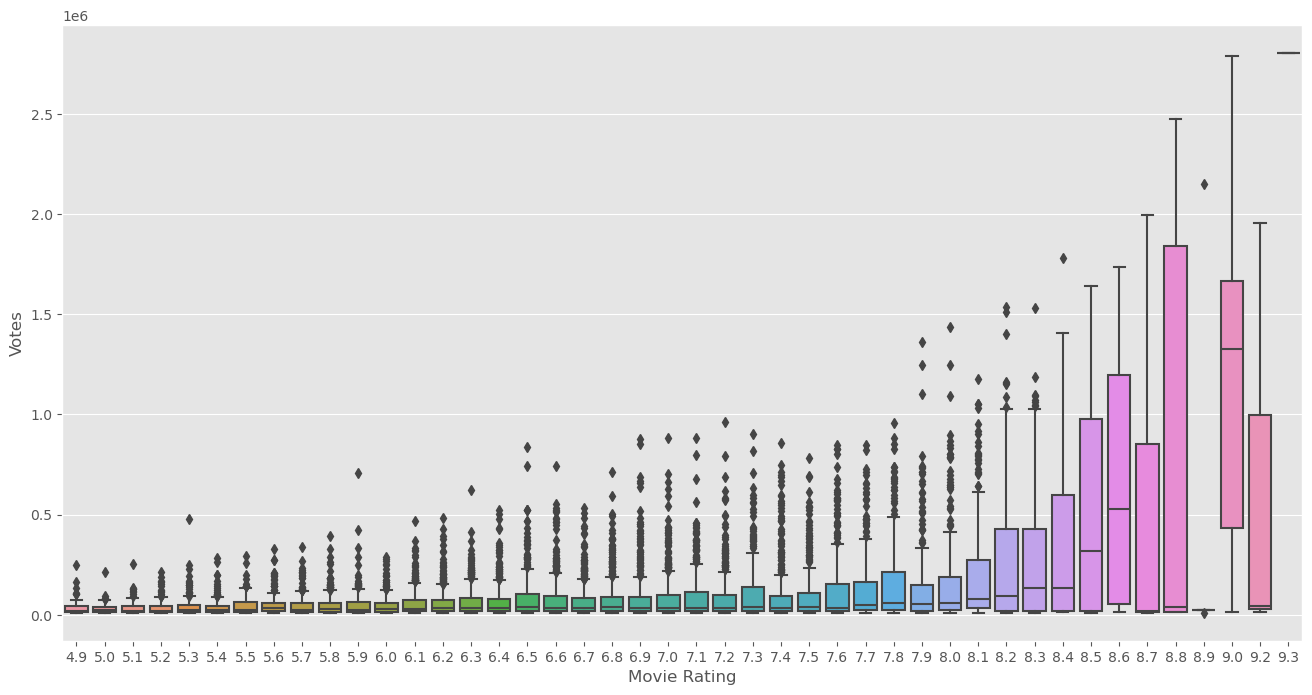

In [80]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x=df_film['Movie Rating'], y=df_film['Votes'], ax=ax)
ax.set_xlabel('Movie Rating')
ax.set_ylabel('Votes')

Genre

In [81]:
all_genres = [genre for sublist in df_film['Genre'] for genre in sublist]

# Convert to a pandas Series and count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

genre_counts

  Drama        3842
Comedy         2534
Action         2357
Drama          2043
  Romance      1743
  Thriller     1644
  Crime        1283
  Adventure    1131
  Comedy       1090
  Mystery      1052
Crime           820
  Horror        728
  Sci-Fi        670
  Fantasy       658
Biography       587
Adventure       543
Horror          482
Animation       480
  Family        455
  History       350
  Music         281
  War           238
  Sport         204
  Action        134
  Musical       130
  Western       107
  Biography     103
Fantasy          59
  Film-Noir      53
Mystery          40
Thriller         19
Film-Noir         8
Sci-Fi            8
Western           5
Family            5
Romance           5
Musical           3
Music             1
History           1
Name: count, dtype: int64

In [82]:
# Normalize the genres by stripping spaces and converting to lowercase
normalized_genres = pd.Series(all_genres).str.strip().str.lower().value_counts()

normalized_genres

drama        5885
comedy       3624
action       2491
crime        2103
romance      1748
adventure    1674
thriller     1663
horror       1210
mystery      1092
fantasy       717
biography     690
sci-fi        678
animation     480
family        460
history       351
music         282
war           238
sport         204
musical       133
western       112
film-noir      61
Name: count, dtype: int64

In [83]:
# Function to check if genre is in the movie's genre list
def genre_in_movie(genre, genre_list):
    return genre in genre_list

# Initialize dictionaries to hold sum of ratings, counts, and gross for each genre
genre_ratings_sum = {genre: 0 for genre in normalized_genres.index}
genre_counts = {genre: 0 for genre in normalized_genres.index}
genre_gross_sum = {genre: 0 for genre in normalized_genres.index}
genre_gross_counts = {genre: 0 for genre in normalized_genres.index}
genre_votes_sum = {genre: 0 for genre in normalized_genres.index}
genre_votes_counts = {genre: 0 for genre in normalized_genres.index}
# Calculate the sum of ratings and counts for each genre
for index, row in df_film.iterrows():
    for genre in normalized_genres.index:
        if genre_in_movie(genre, [g.strip().lower() for g in row['Genre']]):
            genre_ratings_sum[genre] += row['Movie Rating']
            genre_counts[genre] += 1
            if pd.notnull(row['Gross']):  # Check if Gross is not NaN
                genre_gross_sum[genre] += row['Gross']
                genre_gross_counts[genre] += 1
            if pd.notnull(row['Votes']):
                
                genre_votes_sum[genre] += row['Votes']
                genre_votes_counts[genre] += 1

# Calculate average rating and gross for each genre
genre_avg_ratings = {genre: genre_ratings_sum[genre] / genre_counts[genre] for genre in normalized_genres.index}
genre_avg_gross = {genre: genre_gross_sum[genre] / genre_gross_counts[genre] if genre_gross_counts[genre] > 0 else 0 for genre in normalized_genres.index}
genre_avg_votes = {genre : genre_votes_sum[genre]/genre_votes_counts[genre] for genre in normalized_genres.index}
# Convert to pandas Series for easier handling
genre_avg_ratings_series = pd.Series(genre_avg_ratings).sort_values(ascending=False)
genre_avg_gross_series = pd.Series(genre_avg_gross).sort_values(ascending=False)
genre_avg_votes_series = pd.Series(genre_avg_votes).sort_values(ascending=False)
genre_avg_ratings_series.head(5), genre_avg_gross_series.head(5), genre_avg_votes_series.head(5)

(film-noir    7.667213
 war          7.210084
 western      7.149107
 biography    7.118696
 history      7.073504
 dtype: float64,
 animation    8.989203e+07
 adventure    8.782305e+07
 sci-fi       7.479756e+07
 family       6.625533e+07
 action       6.565485e+07
 dtype: float64,
 sci-fi       186360.039823
 adventure    158916.253883
 action       133575.244882
 fantasy      125023.658298
 animation    122868.912500
 dtype: float64)

In [84]:
dict_genres = {"Movie Rating": genre_avg_ratings_series, "Gross": genre_avg_gross_series, "Votes": genre_avg_votes_series}

df_genres = pd.DataFrame(data=dict_genres, )

In [85]:
df_genres.sort_values('Movie Rating',ascending=False)

,Movie Rating,Gross,Votes
film-noir,7.667213,4.359474e+06,43749.131148
war,7.210084,2.253436e+07,85538.243697
western,7.149107,2.663194e+07,74581.544643
biography,7.118696,2.685040e+07,91638.007246
history,7.073504,2.373210e+07,70272.188034
musical,7.012030,2.924620e+07,55215.541353
animation,6.969583,8.989203e+07,122868.912500
drama,6.941954,2.569451e+07,79133.647239
music,6.883333,2.660667e+07,62629.918440
crime,6.776652,2.781279e+07,87689.254398


In [86]:
import plotly.express as px


fig = px.scatter(df_genres, x='Gross', y='Movie Rating', size='Votes',hover_name=df_genres.index)
fig.show()

Directors

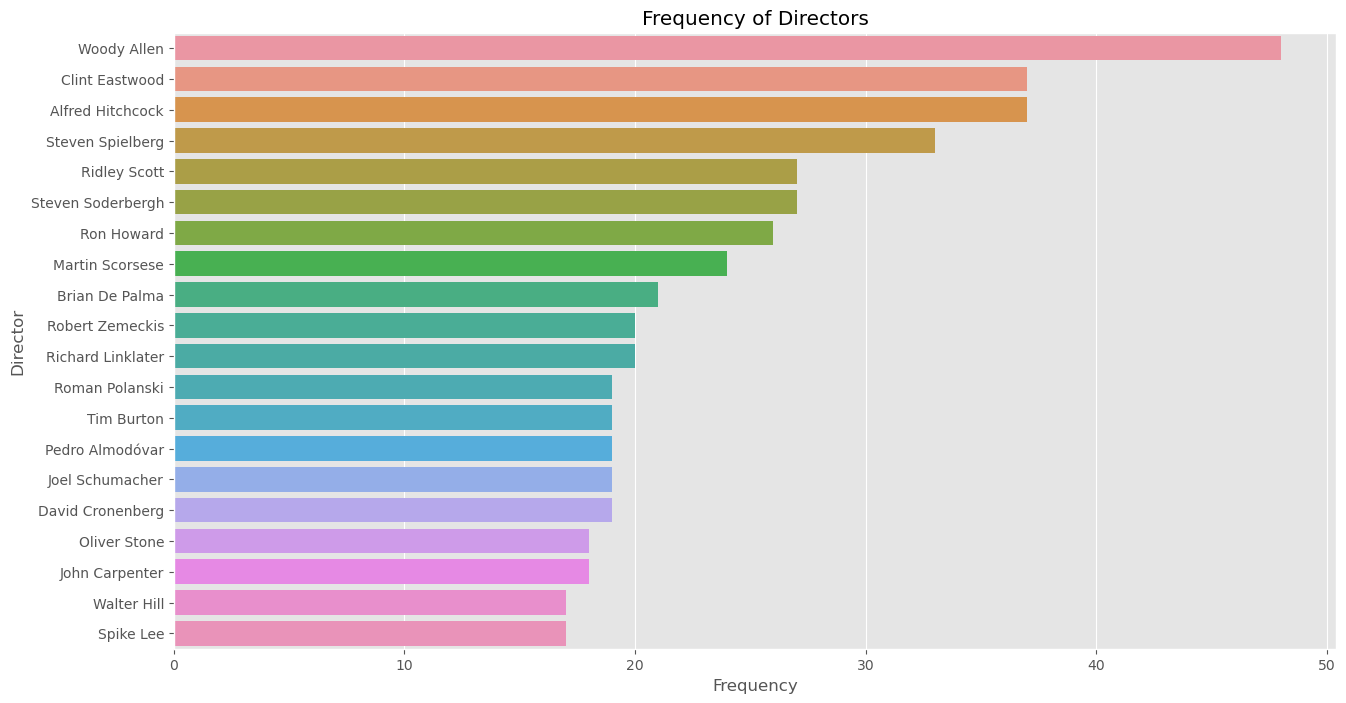

In [87]:
from collections import Counter

all_directors = df_film['Director'].explode()

# Counting directors
director_counts = Counter(all_directors)

# Converting to DataFrame for easy plotting
director_df = pd.DataFrame(director_counts.items(), columns=['Director', 'Count']).sort_values('Count', ascending=False).head(20)

plt.figure(figsize=(15, 8))
sns.barplot(x='Count', y='Director', data=director_df)
plt.title('Frequency of Directors')
plt.xlabel('Frequency')
plt.ylabel('Director')
plt.show()


In [88]:
df_director = df_film[['Director', 'Movie Rating', 'Gross', 'Votes']].explode('Director')
directors = pd.DataFrame(df_director.groupby('Director').agg({'Gross': 'sum', 'Movie Rating': 'max', 'Votes': 'sum'}))
directors['n'] = df_director.groupby('Director').size()
directors.sort_values(by=['Gross', 'Movie Rating'],ascending=False).head(20)

,Gross,Movie Rating,Votes,n
Director,,,,
Steven Spielberg,4.504060e+09,9.0,14108668,33
James Cameron,2.608660e+09,8.6,6321288,8
Michael Bay,2.349290e+09,7.4,4662515,15
Joe Russo,2.281000e+09,8.4,4443657,8
Anthony Russo,2.281000e+09,8.4,4443657,8
J.J. Abrams,2.199400e+09,7.9,3286949,6
Peter Jackson,2.134380e+09,9.0,8644818,13
Ron Howard,2.101400e+09,8.2,4711009,26
Robert Zemeckis,2.086900e+09,8.8,7269969,20


Certification

In [89]:
df_film['Certification'] = df_film['Certification'].map(lambda x: 'PG' if x in ['GP', 'M', 'M/PG', 'TV-PG'] else x)
df_film['Certification'] = df_film['Certification'].map(lambda x: 'PG-13' if x in ['13+', 'TV-13', 'TV-14'] else x)
df_film['Certification'] = df_film['Certification'].map(lambda x: 'NC-17' if x in ['X', '18+'] else x)
df_film['Certification'] = df_film['Certification'].map(lambda x: 'R' if x in ['16+', 'MA-17', 'TV-MA'] else x)
df_film['Certification'] = df_film['Certification'].map(lambda x: 'G' if x in ['TV-G', 'TV-Y', 'TV-Y7', 'TV-Y7-FV'] else x)


In [90]:
movies_per_cert = df_film.groupby('Certification')


Text(0, 0.5, 'Average MetaScore')

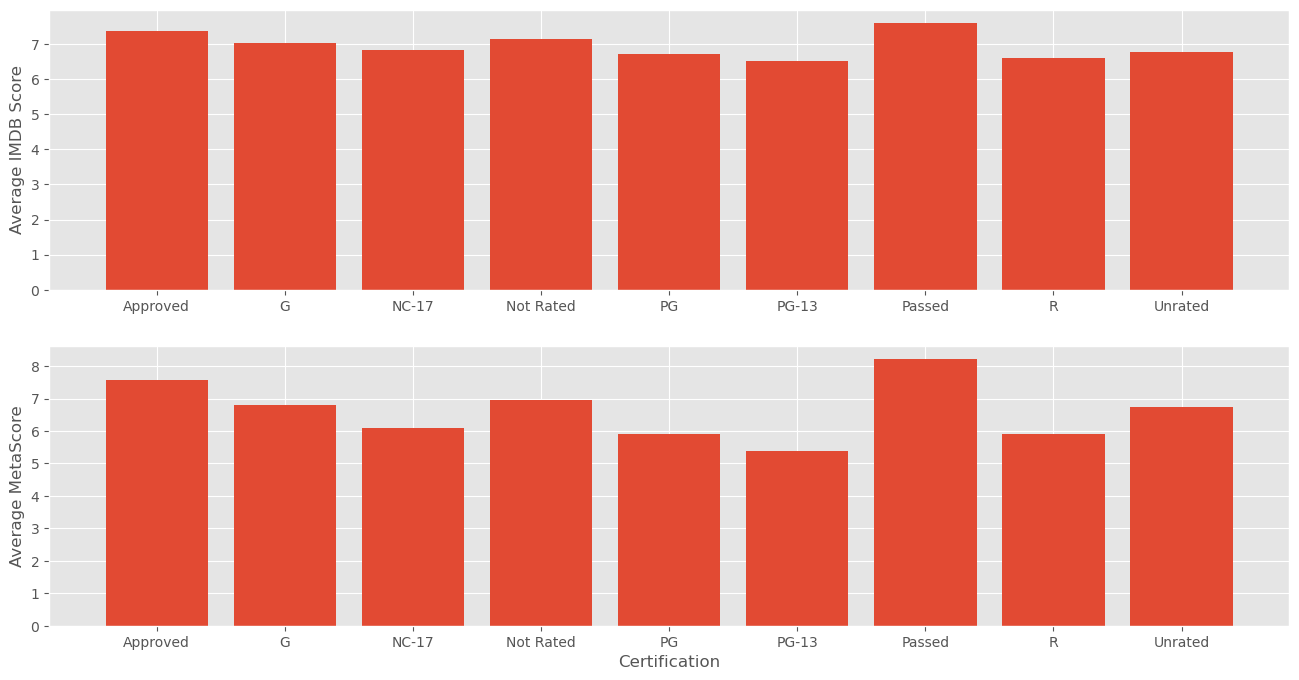

In [91]:
rating_cert = movies_per_cert['Movie Rating'].mean()
metascore_cert = movies_per_cert['MetaScore'].mean()
fig, ax = plt.subplots(2, 1, figsize=(16, 8))
ax[0].bar(rating_cert.index, rating_cert.values)
ax[0].set_ylabel('Average IMDB Score')
ax[1].bar(metascore_cert.index, metascore_cert.values/10)
ax[1].set_xlabel('Certification')
ax[1].set_ylabel('Average MetaScore')

Metascore

In [92]:
df_film['MetaScore'].isnull().sum()

2026

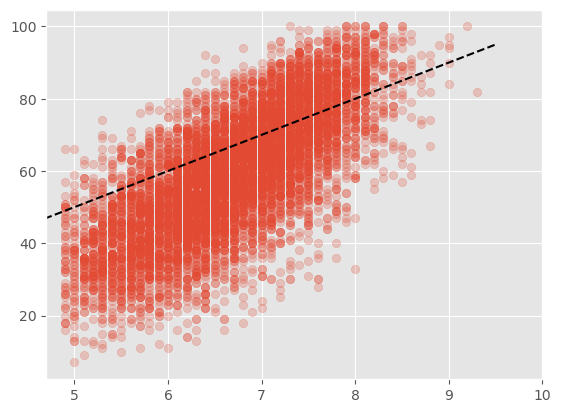

In [93]:
fig, ax = plt.subplots()

ax.scatter(x=df_film['Movie Rating'], y=df_film['MetaScore'], alpha=0.25)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x*10, linestyle="--", color="black", zorder=1)
plt.xlim((4.7,10))

plt.show()

# Feature Selection

In [96]:

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.model_selection import train_test_split
#split to avoid overfitting
X_train,X_test,y_train,y_test=train_test_split(df_film.drop(labels=['Movie Rating'], axis=1),
    df_film['Movie Rating'],
    test_size=0.3,
    random_state=0)

mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.